## Introduction to Bank Churn Prediction Study

Customer retention is a crucial aspect of strategic management for financial institutions, as customer churn significantly impacts profitability and long-term sustainability. This study conducts a comprehensive analysis of customer churn prediction using machine learning techniques, specifically Logistic Regression and Random Forest classifiers. By assessing model performance through metrics such as the Area Under the Curve (AUC) and analyzing key customer attributes, the goal is to enhance predictive accuracy and inform targeted retention strategies.

## Objectives of the Study

1. **Evaluate Model Performance**: To compare the effectiveness of Logistic Regression and Random Forest classifiers in predicting customer churn using the AUC and ROC curve analysis.
2. **Identify Influential Factors**: To determine the key features influencing customer churn, such as age, product usage, balance, and tenure.
3. **Recommend Retention Strategies**: To provide actionable insights and recommendations for improving customer retention based on predictive analysis.

## Problem Statement
How do key customer features, such as age, number of products, and account balance, interact to influence the likelihood of churn, and can these interactions be leveraged to develop more accurate predictive models and targeted customer retention strategies?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Bank_Customer_Churn/"
data = pd.read_csv(path + "Bank_Churn.csv")

In [ ]:
churn_data = data.copy()
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Understanding

- **CustomerId**: *Integer* – Unique customer identifier; non-predictive.
- **Surname**: *String* – Customer's last name; non-predictive.
- **CreditScore**: *Integer* – Represents creditworthiness
- **Geography**: *String* – Country of residence (e.g., France, Spain)
- **Gender**: *String* – Customer's gender
- **Age**: *Integer* – Age of the customer
- **Tenure**: *Integer* – Years with the bank
- **Balance**: *Float* – Account balance; valuable for assessing customer worth.
- **NumOfProducts**: *Integer* – Number of products held; reflects customer engagement.
- **HasCrCard**: *Binary (0/1)* – Ownership of a credit card
- **IsActiveMember**: *Binary (0/1)* – Indicates if the customer is active; suggests engagement level.
- **EstimatedSalary**: *Float* – Approximate yearly income;
- **Exited**: *Binary (0/1)* – Target variable indicating churn status (1 = exited, 0 = retained).

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn_data.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [ ]:
churn_data.duplicated().sum()

0

In [ ]:
#Drop Surname and CustomerId and reset index
churn_data.drop(["Surname", "CustomerId"], axis=1, inplace=True)
churn_data.reset_index(drop=True, inplace=True)

In [ ]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

In [ ]:
# plots of variables vs Exited
#rename exited to Churn
churn_data.rename(columns={"Exited": "Churn"}, inplace=True)

Churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64


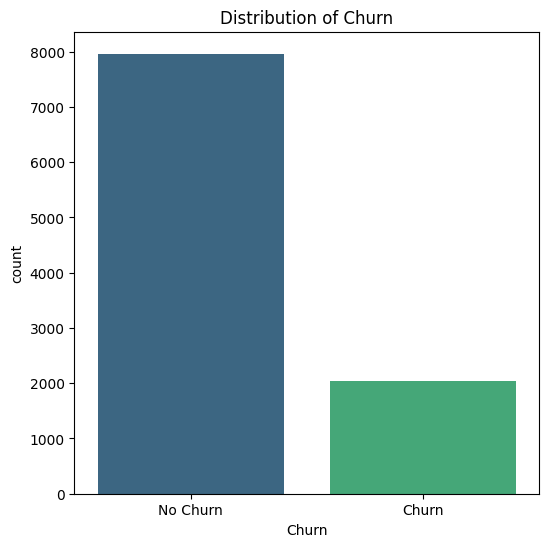

In [ ]:
# Distribution of Churn column
print(churn_data["Churn"].value_counts(normalize=True))
plt.figure(figsize=(6,6))
sns.countplot(x='Churn', data = churn_data, palette='viridis')
plt.title("Distribution of Churn")
plt.xticks([0,1], ["No Churn", "Churn"])
plt.show()

**Univariate Analysis**

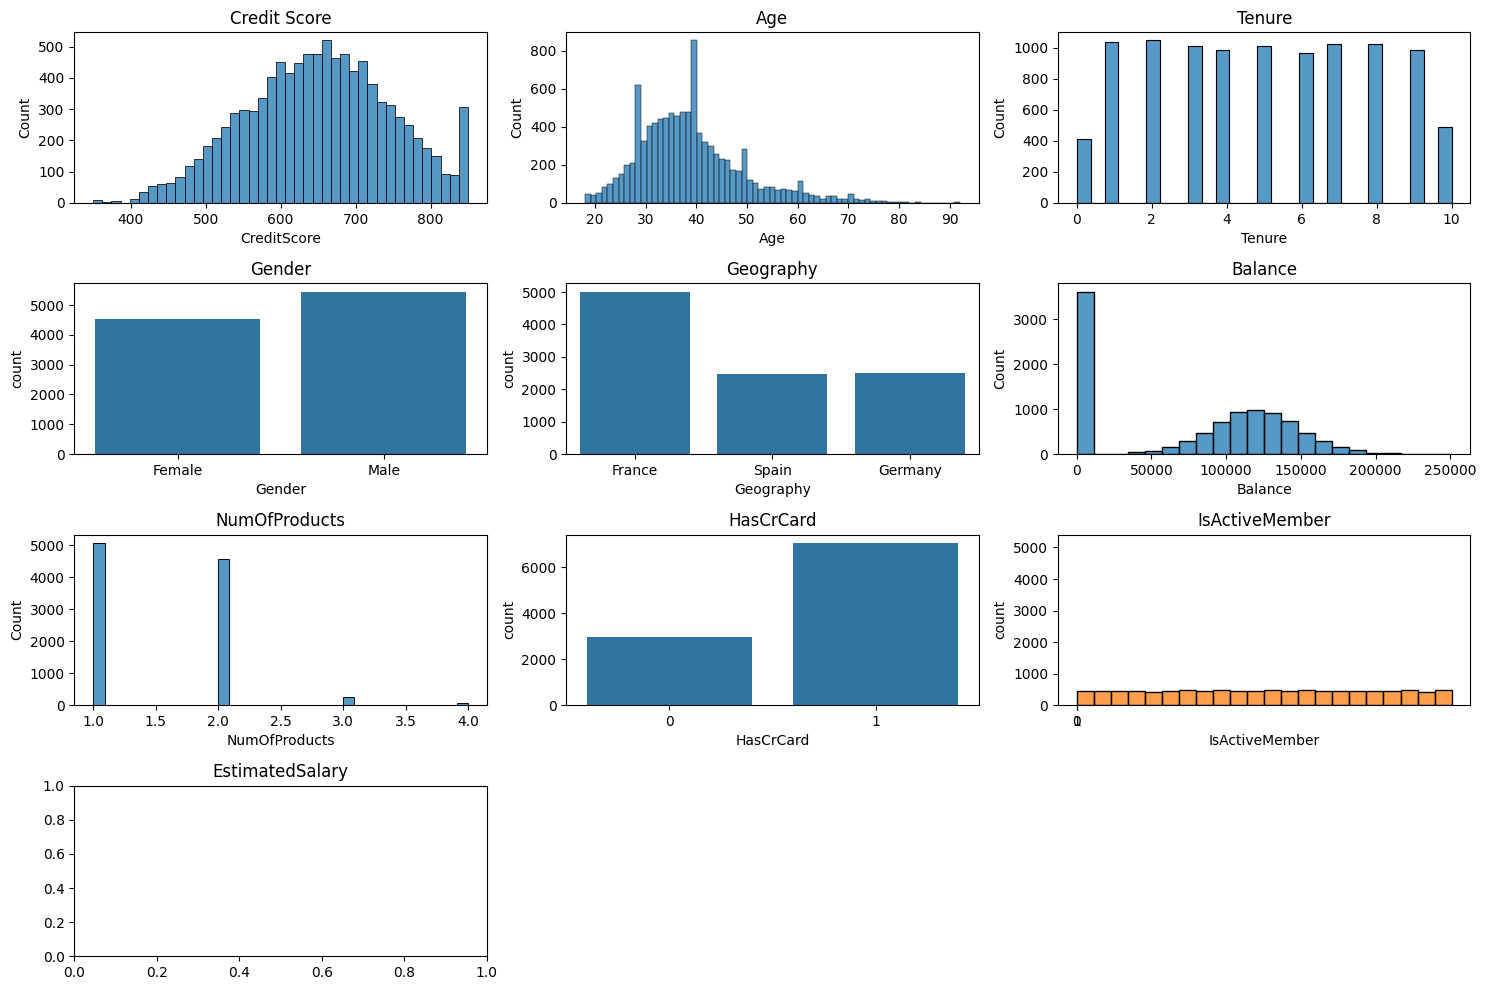

In [ ]:

fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.histplot(x='CreditScore', data=churn_data, ax=ax[0,0])
ax[0, 0].set_title('Credit Score')
sns.histplot(x='Age', data=churn_data, ax=ax[0,1])
ax[0, 1].set_title('Age')
sns.histplot(x='Tenure', data=churn_data, ax=ax[0,2])
ax[0, 2].set_title('Tenure')
sns.countplot(x='Gender', data=churn_data, ax=ax[1,0])
ax[1, 0].set_title('Gender')
sns.countplot(x='Geography', data=churn_data, ax=ax[1,1])
ax[1, 1].set_title('Geography')
sns.histplot(x='Balance', data=churn_data, ax=ax[1,2])
ax[1, 2].set_title('Balance')
sns.histplot(x='NumOfProducts', data=churn_data, ax=ax[2,0])
ax[2, 0].set_title('NumOfProducts')
sns.countplot(x='HasCrCard', data=churn_data, ax=ax[2,1])
ax[2, 1].set_title('HasCrCard')
sns.countplot(x='IsActiveMember', data=churn_data, ax=ax[2,2])
ax[2, 2].set_title('IsActiveMember')
sns.histplot(x='EstimatedSalary', data=churn_data, ax=ax[2,2])
ax[3, 0].set_title('EstimatedSalary')

ax[3, 1].axis('off')
ax[3, 2].axis('off')
plt.tight_layout()
plt.show()


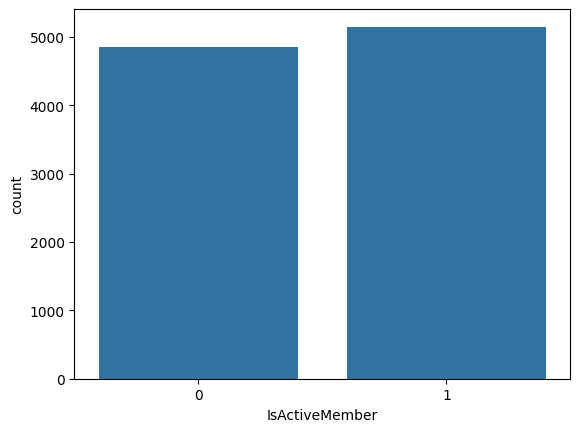

In [ ]:

sns.countplot(x='IsActiveMember', data=churn_data)
plt.show()

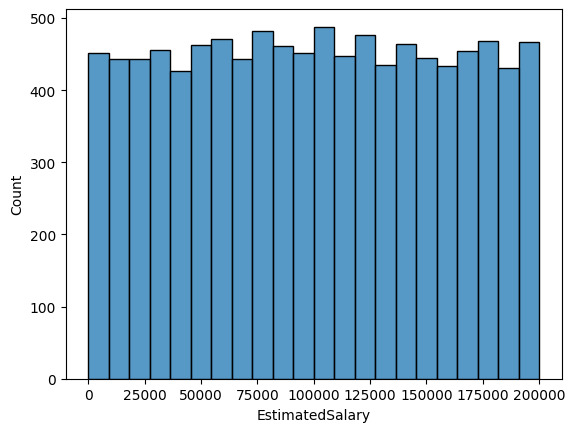

In [ ]:
sns.histplot(x='EstimatedSalary', data=churn_data)
plt.show()

**Multivariate Analysis**

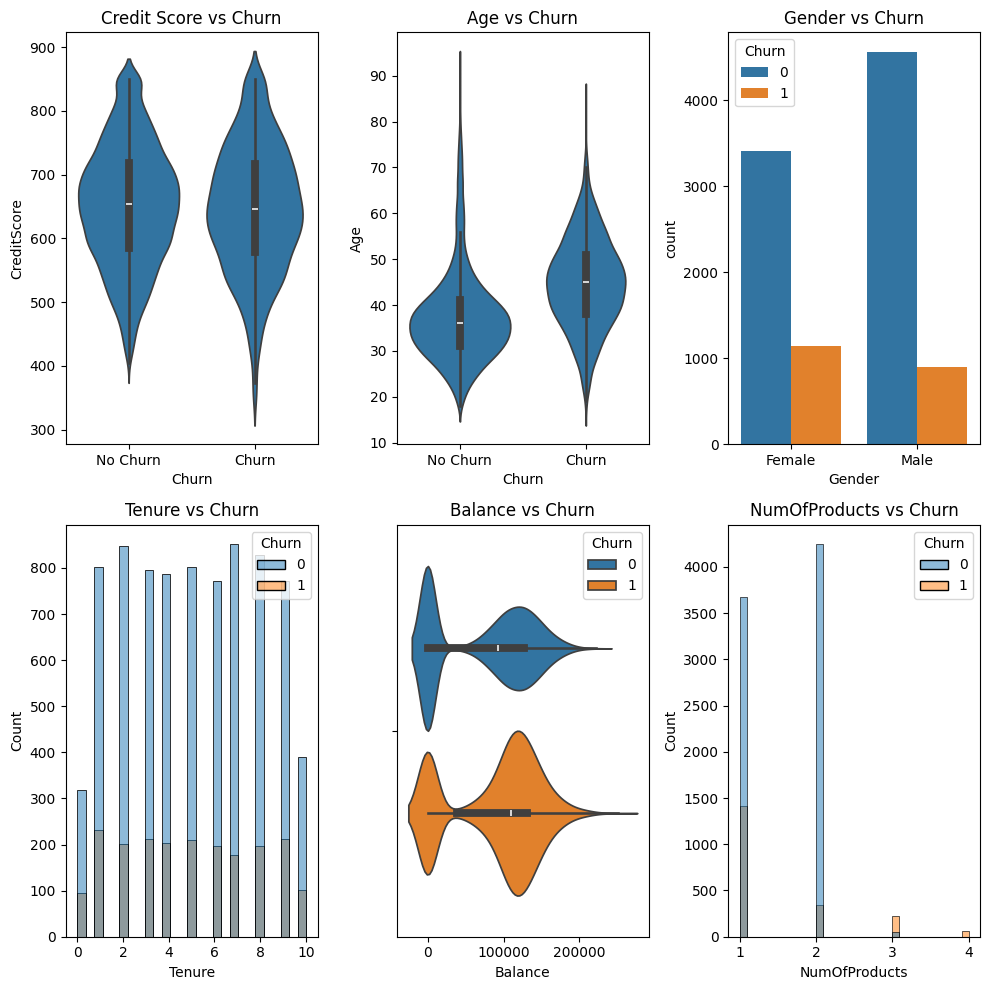

In [ ]:

fig, ax = plt.subplots(2,3, figsize=(10,10))
sns.violinplot(x='Churn', y='CreditScore', data=churn_data, ax=ax[0,0])
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])
ax[0, 0].set_title('Credit Score vs Churn')
sns.violinplot(x='Churn', y='Age', data=churn_data, ax=ax[0,1])
ax[0, 1].set_xticklabels(['No Churn', 'Churn'])
ax[0, 1].set_title('Age vs Churn')
sns.countplot(x='Gender', hue='Churn', data=churn_data, ax=ax[0,2])
ax[0, 2].set_title('Gender vs Churn')
sns.histplot(x='Tenure', hue='Churn', data=churn_data, ax=ax[1,0])
ax[1, 0].set_title('Tenure vs Churn')
sns.violinplot(x='Balance', hue='Churn', data=churn_data, ax=ax[1,1])
ax[1, 1].set_title('Balance vs Churn')
sns.histplot(x='NumOfProducts', hue='Churn', data=churn_data, ax=ax[1,2])
ax[1, 2].set_title('NumOfProducts vs Churn')
plt.tight_layout()
plt.show()



In [ ]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# One hot encoding
churn_data = pd.get_dummies(churn_data)
churn_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [ ]:
X = churn_data.drop("Churn", axis=1)
y = churn_data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_model = LogisticRegression()
# Fit the model
lr = log_model.fit(X_train_scaled, y_train)
print(f"Model Accuracy: {lr.score(X_train_scaled, y_train)}")

Model Accuracy: 0.81125


Accuracy measures the total number of correct classifications divided by the total number of cases.The logistic model attains an accuracy of 81.1% which implies the model is working well.            
However, from the EDA Analysis, the dataset is **highly imbalanced**, with 79.63% of observations indicating no churn (0) and 20.37% of the observations did churn. A model may achieve high accuracy by simply predicting the majority class, even if it fails to correctly classify instances from the minority class.
This is a **major limitation** of relying on accuracy as a performance metric. To see this further, I will breakdown the predictions using a confusion matrix

## Model Evaluation
**Confusion Matrix**

A confusion matrix is a tool used to evaluate the performance of a model and is visually represented as a table. In the basic structure of a confusion matrix, the predictions are broken down into four categories: True Positive, True Negative, False Positive, and False Negative.


In [ ]:
# confusion matrix
# Obtain predictions from the test data
y_pred_lr = lr.predict(X_test_scaled)
# Create confusion matrix
confusion_matrix(y_test, y_pred_lr)

array([[1543,   64],
       [ 314,   79]])

The logistic model predictions were as follows
- 1543 true positives
- 64 false positives
- 314 false negatives
- 79 true negatives



In [ ]:
# Recall Score
print(f"Recall Score: {recall_score(y_test, y_pred_lr)}")
# Precision Score
print(f"Precision Score: {precision_score(y_test, y_pred_lr)}")
# F1 Score
print(f"F1 Score: {f1_score(y_test, y_pred_lr)}")

Recall Score: 0.2010178117048346
Precision Score: 0.5524475524475524
F1 Score: 0.2947761194029851


In [ ]:
# Obtain co-efficients of the dependent variables
coef = pd.DataFrame(lr.coef_, columns=X_train.columns)
coef

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.067619,0.754334,-0.042782,0.160442,-0.0608,-0.010383,-0.533535,0.015718,-0.130936,0.224406,-0.073686,0.132415,-0.132415


While metrics like precision, recall, and F1-score provide insights about which model best fits the data, they do so only at a single threshold.
The AUC-ROC, or Area Under the Receiver Operating Characteristic Curve, is a robust metric that evaluates the goodness of the model across the full spectrum of thresholds.

**ROC Curve and AUC**

AUC and ROC are valuable metrics for evaluating logistic regression models in churn prediction.

The ROC curve visualizes the trade-off between true and false positives, while the AUC score quantifies the model's overall performance.

The ROC curve is a visual representation of the trade-offs between the true positive rate (TPR) and false positive rate (FPR) at various thresholds. It provides insights into how well the model can balance the trade-offs between **detecting positive** instances and **avoiding false positives** across different thresholds.

AUC, or Area Under the Curve, is a **single scalar value** ranging from 0 to 1, that gives a performance snapshot of the model.

These metrics are robust to imbalanced datasets and help identify optimal classification thresholds.

A higher AUC indicates better model performance, enabling businesses to make informed decisions for customer retention.

AUC Score for Logistic Regression: 0.7788476306743239


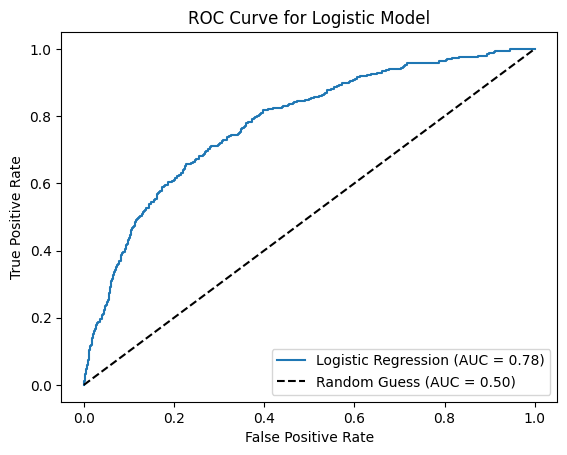

In [ ]:
# generate probabilities for the test set
y_pred_prob = lr.predict_proba(X_test_scaled)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob)
auc_lr = auc(fpr1, tpr1)
print(f"AUC Score for Logistic Regression: {auc_lr}")
# Plot ROC curve
plt.plot(fpr1, tpr1, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Model')
plt.legend()
plt.show()

## **Random Forest Model**


In [ ]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [ ]:
# initialize
rf = RandomForestClassifier()
# fit model
rf.fit(X_train, y_train)
# Accuracy
print(f"Model Train Accuracy: {rf.score(X_train, y_train)}")
print(f"Model Test Accuracy: {rf.score(X_test, y_test)}")

Model Train Accuracy: 1.0
Model Test Accuracy: 0.864


The model has perfectly memorized the training data, leading to overfitting. This is evident from the perfect training accuracy of 1.0. However, the model struggles to generalize to unseen data, as indicated by the lower test accuracy of 0.866. This suggests that the model is too complex and has learned noise rather than underlying patterns

## **Hyperparameter tuning**
### **RandomizedSearchCV**
Given that the model is overfitted, a common technique to address this issue is through hyperparameter tuning using RandomizedSearchCV.

Random search cross-validation is a technique that searches for the optimal hyperparameters of a model by evaluating the model's performance on **random combinations** of hyperparameter values. The idea is to define a set of hyperparameters and a range of values for each hyperparameter, and then randomly sample values from these ranges to **create different combinations** of hyperparameters. This process is repeated a specified number of times, and the best combination of hyperparameters that produces the best performance on a validation set is selected.

By adjusting parameters like the number of trees, maximum depth, and minimum samples per leaf, RandomizedSearchCV can help reduce overfitting and enhance the model's ability to make accurate predictions on unseen data.

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'n_estimators': np.arange(start = 100, stop = 1100, step=100),
    'max_depth': np.arange(start =1, stop = 10, step =1),
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt'],
    'max_samples': [None,0.3 ,0.5, 0.9],
    'min_samples_leaf': [2, 5, 10, 20, 100]
}

grid = RandomizedSearchCV(rf,params, n_iter=100, scoring= "accuracy")
grid.fit(X_train, y_train)
# generate best parameters
grid.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 5,
 'max_samples': 0.5,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': True}

**GridSearchCV**

Grid search cross-validation is a technique that searches for the optimal hyperparameters of a model by evaluating the model's performance on different combinations of hyperparameter values. The idea is to define a set of hyperparameters and a range of values for each hyperparameter, and then search for the optimal combination of hyperparameters that produces the best performance on a validation set. This process is called a grid search because it searches over a grid of hyperparameters.


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': np.arange(start=250, stop=510, step=10),  # Fewer estimators to reduce complexity
    'max_depth': [6, 9,12],                                   # Limit depth to avoid overfitting noise

    'max_samples': [0.4, 0.5, 0.6],                            # Remove overly restrictive values
    'min_samples_leaf': [2, 5, 10]                             # Focus on smaller leaf sizes
}

grid = GridSearchCV(rf, params, scoring="accuracy")
grid.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(grid.best_params_)

{'max_depth': 12, 'max_samples': 0.4, 'min_samples_leaf': 2, 'n_estimators': 260}


Grid search evaluates the model's performance on a predefined grid of hyperparameters, whereas random search samples hyperparameters randomly from a distribution.

Grid search can be more efficient in cases where the hyperparameters are highly correlated and have a strong interaction effect, but it can be computationally expensive when the hyperparameter space is large. On the other hand, the random search can be more efficient when the hyperparameter space is large and the optimal hyperparameters are not highly correlated.

Another difference between random search and grid search is the number of hyperparameters they can search. Grid search can search a large number of hyperparameters, but it can become computationally expensive as the number of hyperparameters increases. Random search, on the other hand, can search a larger number of hyperparameters without becoming too computationally expensive, as it samples hyperparameters randomly.

In [ ]:
# initialize
rf = RandomForestClassifier(n_estimators=260,
                            min_samples_leaf=2,
                             max_samples=0.4,
                             max_depth=12,
                             bootstrap=True)

# fit model
rf.fit(X_train, y_train)
# Accuracy
print(f"Model Train Accuracy: {rf.score(X_train, y_train)}")
print(f"Model Test Accuracy: {rf.score(X_test, y_test)}")

Model Train Accuracy: 0.894875
Model Test Accuracy: 0.8615


In [ ]:
# Generate probabilities
y_probs = rf.predict_proba(X_test)[:, 1]
# Generate predictions
y_pred = rf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_rf = auc(fpr, tpr)
print(f"AUC Score for Random Forest: {auc_rf}")

AUC Score for Random Forest: 0.8675815571505706


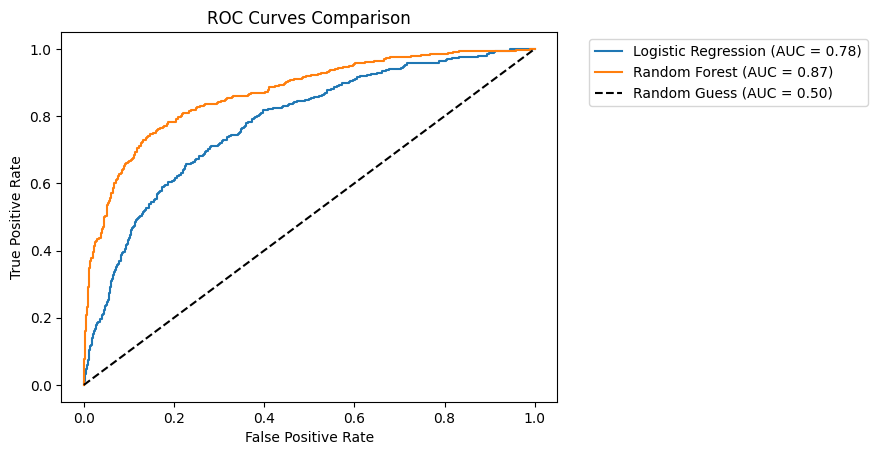

In [ ]:
# plot roc curves for logistic regression, Random forest and random guess
plt.plot(fpr1, tpr1, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Evaluating Model Performance: A Comparative Analysis

**ROC Curve Analysis**

The provided ROC curves offer a visual comparison of the performance of Logistic Regression and Random Forest classifiers. The Area Under the Curve (AUC) metric quantifies the overall performance of each model.

**Key Observations:**

1. **Random Forest Superiority:** The Random Forest model demonstrates significantly superior performance, as evidenced by its higher AUC score (0.87) compared to Logistic Regression (0.78).
2. **Discriminative Power:** Both models outperform the random guess (AUC = 0.50), indicating their ability to distinguish between positive and negative classes.
3. **Model Stability:** The Random Forest model's ROC curve exhibits a smoother trajectory, suggesting greater stability and robustness across various classification thresholds. In contrast, the Logistic Regression curve shows more fluctuations, potentially indicating sensitivity to specific decision thresholds.

**Implications:**

* **Model Selection:** For the given dataset and task, the Random Forest model is the preferred choice due to its superior performance and stability.
* **Future Improvements:** While the Random Forest model performs well, further optimization through techniques like hyperparameter tuning and feature engineering could potentially enhance its performance.
* **Model Interpretability:** If interpretability is a critical factor, Logistic Regression might be considered despite its lower performance. However, techniques like SHAP (SHapley Additive exPlanations) can be employed to improve the interpretability of complex models like Random Forest.

**Conclusion**

Based on the ROC curves and AUC scores, the Random Forest model emerges as a more effective classifier for the given dataset. Its superior performance and stability make it a reliable choice for predictive modeling tasks. However, the choice of model should ultimately depend on the specific requirements of the application, including factors such as accuracy, interpretability, and computational cost.


### **Feature Importance**

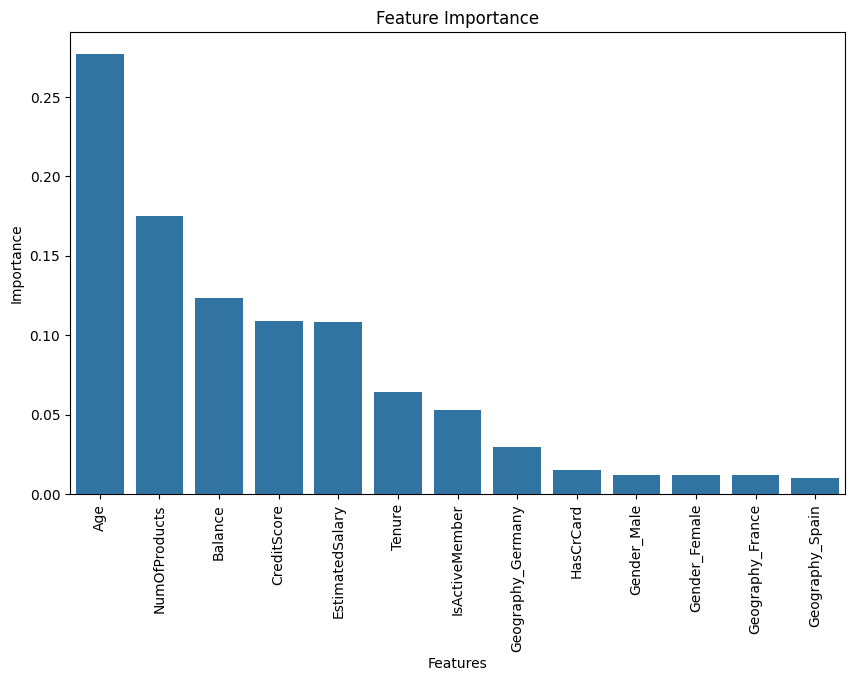

In [ ]:
importance = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['Importance'])
importance.sort_values(by='Importance', ascending=False, inplace=True)
# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.index, y=importance['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Analysis

- Age: This feature emerges as the most influential factor in predicting churn. **Older customers** might have different needs and expectations, making them more susceptible to churn.
- Number of Products: This feature ranks second in importance. Customers with a **higher** number of products might be **more loyal** and less likely to churn.
- Balance: The customer's balance is also a significant factor. High-balance customers might be **more valuable** to the bank and hence less likely to churn.
- Credit Score: A good credit score indicates financial stability and trustworthiness. Customers with **higher** credit scores might be less likely to churn.
- Estimated Salary: This feature likely captures the customer's financial status, which can influence their loyalty.
- Tenure: The **longer** a customer has been with the bank, the **less likely** they are to churn.
- Is Active Member: Active members are likely more engaged and less prone to churn.
- Geography: Geographic location might influence customer behavior and preferences, impacting churn rates.
- Has Credit Card: Customers with credit cards might be more loyal due to **additional benefits and services**.
- Gender: Gender might play a role in customer behavior and preferences, but its impact seems to be **less significant** compared to other factors.

**Model Performance and Evaluation**

The Random Forest model achieved a higher AUC score of 0.87, indicating superior discriminative power and stability across various classification thresholds. Its smoother ROC curve suggests a more consistent performance, making it a robust choice for this predictive task. In contrast, the Logistic Regression model, while achieving a respectable AUC score of 0.78, exhibited more fluctuations in its ROC curve, hinting at potential sensitivity to certain decision thresholds.

When conducting **Random Search CV** and **Grid Search CV** to tune the hyperparameters of the models, the performance of the Random Forest classifier was further optimized. These cross validation strategies provided systematic approaches to exploring the hyperparameter space, where Random Search CV allowed for a more extensive, randomized sampling, identifying promising parameter combinations quickly. Grid Search CV, on the other hand, refined this process by exhaustively evaluating all combinations within specified hyperparameter grids.



### Recommendations for Customer Retention:

1. **Targeted Marketing**: Prioritize retention efforts for older customers and those with fewer products.
2. **Personalized Offers**: Tailor offers and incentives based on customer balance, credit score, and estimated salary.
3. **Enhanced Customer Experience**: Focus on improving customer satisfaction and engagement, especially for active members and long-tenure customers.
4. **Product Bundling**: Consider bundling products to increase customer value and reduce churn.
5. **Financial Incentives**: Offer targeted discounts, rewards, or loyalty programs to retain high-value customers.
6. **Customer Segmentation**: Segment customers based on features like age, tenure, and product usage to implement more effective retention strategies.